# Deep Learning with a Small Data Set

## Objective

Improve model in notebook 00.  Using transfer learning.

## Import Libraries 

In [1]:
import pathlib
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report,\
    accuracy_score

import casting_defects_sample_data
import casting_defects_plots
import casting_defects_models

Using TensorFlow backend.


## Setup

In [2]:
BATCH_SIZE = 64
NO_EPOCHS = 10
MODEL_NAME = 'updated_cnn_01'
TRAIN_NEURAL_NETWORK = False
NO_MODELS = 30
CREATE_SAMPLE = False
NO_TRAIN = 125
NO_TEST = 125

plt.style.use('ggplot')

# Setup output directory if it does not exist.
output_dir = pathlib.Path().cwd() / 'output'
try:
    output_dir.mkdir()
except FileExistsError:
    pass

The setup parameters are:

* __BATCH_SIZE__.  Size of mini-batch.
* __NO_EPOCHS__. Number of epochs to train over.
* __MODEL_NAME__. Name of directory for storing the model and history.
* __TRAIN_NEURAL_NETWORK__. A boolean specifying whether more neural networks should be trained and added to the ensemble.
* __NO_MODELS__.  If __TRAIN_NEURAL_NETWORK__ is set to true, the number of models to train.
* __CREATE_SAMPLE__. A boolean specifying whether to generate a data sample.
* __NO_TRAIN__.  Number of training examples to sample for 'small' sample data set.
* __NO_TEST__.  Number of test examples to sample for 'small' sample data set.

## Sample Data

In [3]:
# Take a sample of the original data. 
orig_dir = pathlib.Path.cwd().parent  / 'input'
sample_dir = pathlib.Path().cwd() / 'sample_data/'

if CREATE_SAMPLE: 
    casting_defects_sample_data.sample_data(
        orig_dir, sample_dir, no_train=NO_TRAIN, no_test=NO_TEST)

## Instantiate Image Generators

In [4]:
# Instantiate image generators on sampled data.
input_dir = sample_dir
data_sets = ('train', 'test')
train_dir, test_dir = [next(input_dir.rglob(ds)) for ds in data_sets]

trainval_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.02,
    horizontal_flip=True,
    vertical_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1. / 255
)

##  Define Model Architecture

In [5]:
# Create neural network architecture.
model = Sequential([
    Conv2D(32, kernel_size=3, input_shape=(300, 300, 1), activation='relu'),
    MaxPool2D(4),
    Conv2D(64, kernel_size=3, input_shape=(300, 300, 1), activation='relu'),
    MaxPool2D(4),
    Conv2D(32, kernel_size=3, input_shape=(300, 300, 1), activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

## Model Ensemble

In [6]:
# Instantiate a custom CastingDefectsModels class.
# Provides methods for training , evaluating and predicting on and 
# ensemble of models. 
cdf = casting_defects_models.CastingDefectModels(
    train_dir=train_dir,
    test_dir=test_dir,
    output_dir=output_dir / MODEL_NAME,
    trainval_datagen=trainval_datagen,
    test_datagen=test_datagen,
    model=model,
    no_epochs=NO_EPOCHS
)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


Found 125 images belonging to 1 classes.
Found 125 images belonging to 1 classes.


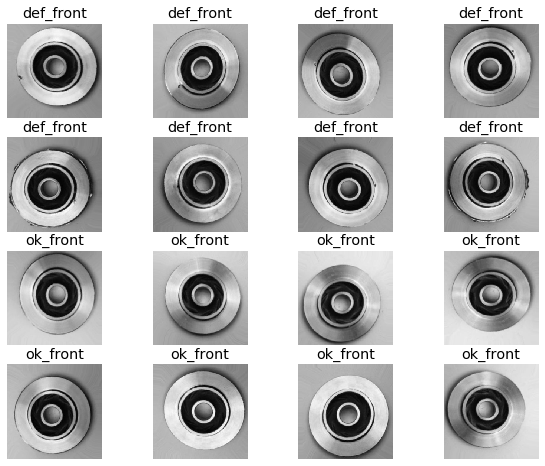

In [7]:
# Generate some examples of pre-processed images.
example_plot = cdf.generate_examples(nrows=2, ncols=4, figsize=(10, 8))

In [8]:
# Train models.
if TRAIN_NEURAL_NETWORK:
    cdf.train_models(no_models=NO_MODELS)

history = cdf.gather_ensemble_history()

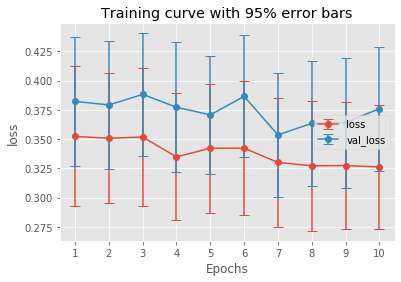

In [9]:
plot_ensemble_hist = cdf.plot_ensemble_history('loss') 

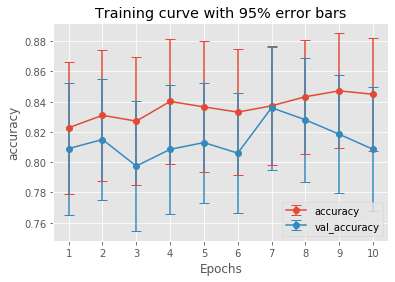

In [10]:
plot_ensemble_hist = cdf.plot_ensemble_history('accuracy') 

In [11]:
pred_prob, raw_predictions = cdf.ensemble_predictions()

# True class.
true_class = cdf.test_generator.classes

Predicting with model #0001: model_0b7030f3-70d3-45d5-afa0-1d7afdcc2c10.h5
Predicting with model #0002: model_50976cf1-9a3a-4f44-8332-8baa6764b7de.h5
Predicting with model #0003: model_d38cf4d2-615e-44f7-bae0-836e5799878e.h5
Predicting with model #0004: model_7111ba09-cbd4-4332-8bff-f56a827c87a2.h5
Predicting with model #0005: model_861b61fe-0b9c-4c7d-898f-7014d1b5819d.h5
Predicting with model #0006: model_e0e0cea8-f1d2-45c1-b49e-ad7e60c46e7f.h5
Predicting with model #0007: model_11e4077b-4365-4494-a7c4-55c02325e0df.h5
Predicting with model #0008: model_808b2412-ea0e-4a5c-a1ea-2c18f8998d33.h5
Predicting with model #0009: model_81c65bb9-2aee-4c4b-b086-3b31ac4bdf0a.h5
Predicting with model #0010: model_cf518ccd-3558-4e0d-a43e-f19025b8657b.h5
Predicting with model #0011: model_9d2dd97d-f76c-4921-803f-2f3d292dea13.h5
Predicting with model #0012: model_5dc82028-ff34-463d-a0a8-882ce6800247.h5
Predicting with model #0013: model_2298e565-dfff-42f1-a8f9-46b97d5c0f78.h5
Predicting with model #00

### Distribution of Accuracy 

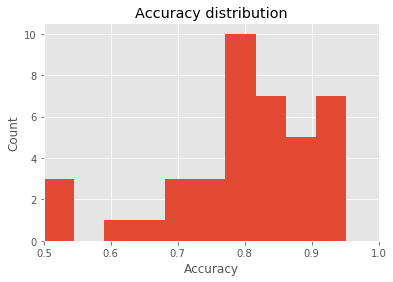

In [12]:
acc_scores = []
for y_pred_i in raw_predictions:
    acc_scores.append(accuracy_score(true_class, y_pred_i > 0.5))

fig, ax = plt.subplots()

ax.hist(acc_scores, bins=10)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Count')
ax.set_xlim(0.5, 1)
_ = ax.set_title('Accuracy distribution')

### Confusion Matrix

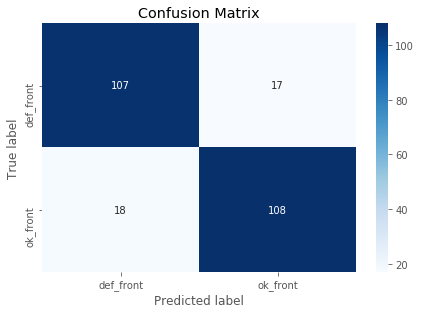

In [13]:
# Predicted class
pred_class = [elem > 0.5 for elem in pred_prob['mean']]


# Get label/target encoding.
class_indices = [[k, v] for k, v in cdf.test_generator.class_indices.items()]
target_names, labels = list(zip(*class_indices))
cm = confusion_matrix(pred_class, true_class)

casting_defects_plots.plot_confusion_matrix(cm, labels=target_names)

### Classification Report

In [14]:
print(classification_report(pred_class, true_class,
                            labels=labels, target_names=target_names))

              precision    recall  f1-score   support

   def_front       0.86      0.86      0.86       124
    ok_front       0.86      0.86      0.86       126

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



### Aggregate Predictions

No handles with labels found to put in legend.


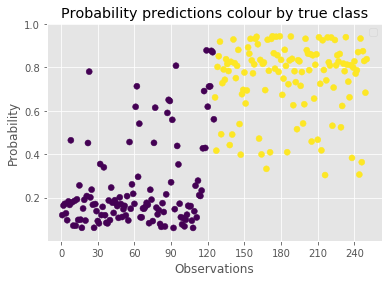

In [15]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()

mean_prob = pred_prob['mean']
std_err_prob = pred_prob['std_err']

ax.scatter(x=range(1, len(mean_prob) + 1),
           y=mean_prob,
           c=true_class)
ax.set_title('Probability predictions colour by true class')
ax.set_xlabel('Observations')
ax.set_ylabel('Probability')
ax.legend()
_ = ax.xaxis.set_major_locator(MaxNLocator(integer=True))
